In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### First moment

In [2]:
from scipy.stats import ttest_1samp

p_dict = {}
for m in np.arange(0, 0.55, 0.05):
    p = []
    for i in range(100):
        ss = np.random.normal(m, np.sqrt(2), size=200)
        pvalue = ttest_1samp(ss, 0)[1]
        p.append(pvalue)
    print(f'm: {m:3.2f}, pvalue: {np.mean(p)}')
    p_dict[f'{m:3.2f}'] = np.mean(p)

m: 0.00, pvalue: 0.49079913056568875
m: 0.05, pvalue: 0.44564366335181765
m: 0.10, pvalue: 0.3391368157663896
m: 0.15, pvalue: 0.23508704623387452
m: 0.20, pvalue: 0.13936203493764865
m: 0.25, pvalue: 0.05644775122811049
m: 0.30, pvalue: 0.03006956634296847
m: 0.35, pvalue: 0.0127316345227461
m: 0.40, pvalue: 0.006183632250967766
m: 0.45, pvalue: 0.0034889811162863126
m: 0.50, pvalue: 0.00039072167316936814


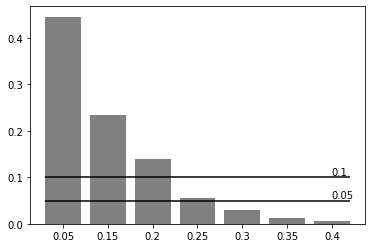

In [3]:
p = [0.05, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
for i in range(len(p)):
    plt.bar(i, p_dict[f'{p[i]:3.2f}'], color='grey')
plt.xticks(list(range(len(p))), p)
plt.hlines([0.05, 0.1], -0.4, 6.4)
plt.text(6, 0.055, '0.05')
plt.text(6, 0.105, '0.1');

### Third moment

In [19]:
import seaborn as sns
import pandas as pd
from scipy.stats import skewnorm, skew, norm, shapiro


def gen_skewnormal(mean, var, alpha, size, random_state=None):
    # generate standard skew normal distribution
    X = skewnorm.rvs(alpha, loc=0, scale=1, size=size, random_state=random_state)
    
    # theory expectation value (mean) and variance of standard skew normal distribution
    tmean = np.sqrt(2/np.pi) * alpha / np.sqrt(1+alpha**2)
    tvar = 1 - 2/np.pi * alpha**2 / (1+alpha**2)

    # normalize
    X = np.sqrt(var/tvar) * X
    tmean = np.sqrt(var/tvar) * np.sqrt(2/np.pi) * alpha / np.sqrt(1+alpha**2)
    X = X + mean - tmean
    return X

def tskew(alpha):
    """find the theoretical skewness of skew-normal by given alpha"""
    d = alpha / np.sqrt(1+alpha**2)
    return (4-np.pi)/2 * (d*np.sqrt(2/np.pi)) ** 3 / (1-2*d**2/np.pi) ** (3/2)

size = 50
alpha = 0.4:   skew=0.1706212322376521
alpha = -0.4:  skew=-0.18446363576422123
size = 100
alpha = 0.4:   skew=0.080796537291921
alpha = -0.4:  skew=-0.0542635698165929
size = 1000
alpha = 0.4:   skew=0.10541163939892939
alpha = -0.4:  skew=-0.04116840666157428
size = 10000
alpha = 0.4:   skew=0.013044671441687224
alpha = -0.4:  skew=-0.03678186105703824
size = 100000
alpha = 0.4:   skew=0.005286511022077123
alpha = -0.4:  skew=-0.014922936576753785
size = 1000000
alpha = 0.4:   skew=0.00951969097934977
alpha = -0.4:  skew=-0.012407336614351649
size = 2000000
alpha = 0.4:   skew=0.014724843979077702
alpha = -0.4:  skew=-0.00979397636976379
size = 5000000
alpha = 0.4:   skew=0.011033372533556463
alpha = -0.4:  skew=-0.009619711839852102


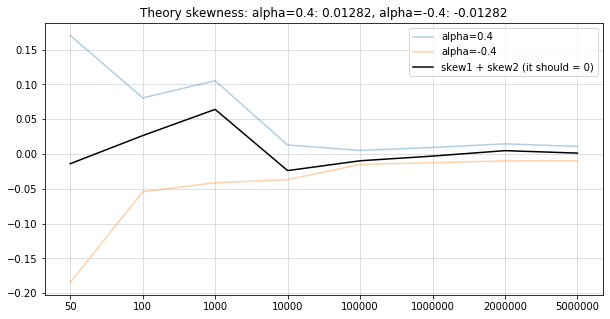

In [17]:
### the converge speed of sample skewness

alpha = 0.4
sk1 = []
sk2 = []
test_size = [50, 100, 1000, 10000, 100000, 1000000, 2000000, 5000000]
for size in test_size:
    x1 = skewnorm.rvs(alpha, loc=0, scale=1, size=size)
    sk1.append(skew(x1))
    x2 = skewnorm.rvs(-alpha, loc=0, scale=1, size=size)
    sk2.append(skew(x2))
    print(f'size = {size}')
    print(f'alpha = {alpha}:   skew={skew(x1)}')
    print(f'alpha = {-alpha}:  skew={skew(x2)}')

# it seems like the sample skewness converge enough when sample size over 10000
plt.figure(figsize=(10, 5))
plt.plot(sk1, alpha=0.35, label=f'alpha={alpha}')
plt.plot(sk2, alpha=0.35, label=f'alpha={-alpha}')

sk12 = [i+j for i, j in zip(sk1, sk2)]  # it should be zero, if no sampling error
plt.plot(sk12, color='k', label='skew1 + skew2 (it should = 0)')
plt.grid(True, alpha=0.5)
plt.xticks(ticks=range(len(test_size)), labels=test_size)
plt.legend()
plt.title(f'Theory skewness: alpha={alpha}: {tskew(alpha):.5f}, alpha={-alpha}: {tskew(-alpha):.5f}');

size = 50
alpha = 2.5:   skew=1.0491435413993575
alpha = -2.5:  skew=-0.7390414681998847
size = 100
alpha = 2.5:   skew=0.2196078553562217
alpha = -2.5:  skew=-0.7470543708782299
size = 1000
alpha = 2.5:   skew=0.6004759958331
alpha = -2.5:  skew=-0.5450948685579463
size = 10000
alpha = 2.5:   skew=0.5471099740731658
alpha = -2.5:  skew=-0.5894182762567344
size = 100000
alpha = 2.5:   skew=0.558899755476406
alpha = -2.5:  skew=-0.5922213518130541
size = 1000000
alpha = 2.5:   skew=0.5793292789659686
alpha = -2.5:  skew=-0.5748900985471327
size = 2000000
alpha = 2.5:   skew=0.5759644502117929
alpha = -2.5:  skew=-0.5724693637381136
size = 5000000
alpha = 2.5:   skew=0.5754794164088785
alpha = -2.5:  skew=-0.5758873915939562


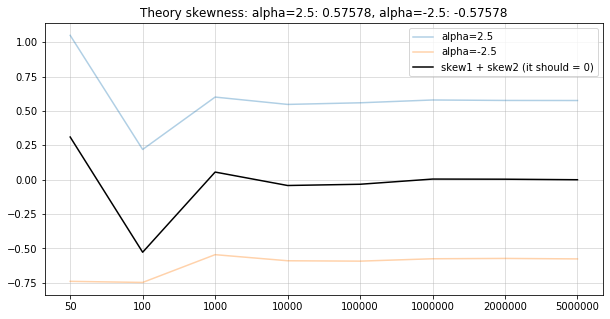

In [18]:
### alpha = 2.5 or -2.5

alpha = 2.5
sk1 = []
sk2 = []
test_size = [50, 100, 1000, 10000, 100000, 1000000, 2000000, 5000000]
for size in test_size:
    x1 = skewnorm.rvs(alpha, loc=0, scale=1, size=size)
    sk1.append(skew(x1))
    x2 = skewnorm.rvs(-alpha, loc=0, scale=1, size=size)
    sk2.append(skew(x2))
    print(f'size = {size}')
    print(f'alpha = {alpha}:   skew={skew(x1)}')
    print(f'alpha = {-alpha}:  skew={skew(x2)}')

plt.figure(figsize=(10, 5))
plt.plot(sk1, alpha=0.35, label=f'alpha={alpha}')
plt.plot(sk2, alpha=0.35, label=f'alpha={-alpha}')

sk12 = [i+j for i, j in zip(sk1, sk2)]  # it should be zero, if no sampling error
plt.plot(sk12, color='k', label='skew1 + skew2 (it should = 0)')
plt.grid(True, alpha=0.5)
plt.xticks(ticks=range(len(test_size)), labels=test_size)
plt.legend()
plt.title(f'Theory skewness: alpha={alpha}: {tskew(alpha):.5f}, alpha={-alpha}: {tskew(-alpha):.5f}');

# sample skewness converge faster for larger alpha compare to smaller alpha?
#####
#####
##### need to find the random seed which make the sample skewness close to theoritical skewness when alpha is small

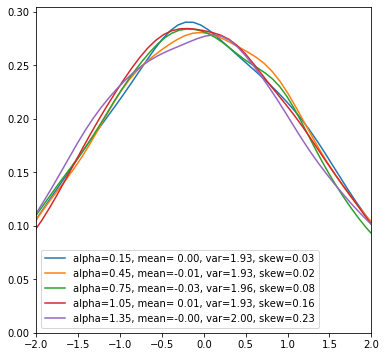

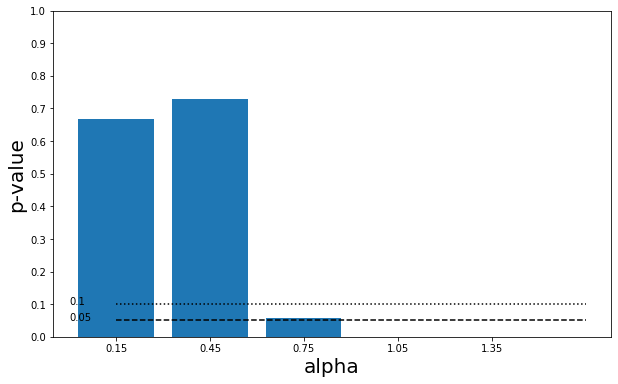

In [20]:
alphas = np.arange(0.15, 1.65, 0.3)
size = 4500

# find the random seed which make the samples skewness close to theoritical skewness
# and plot the corresponding pdf (kde estimate)
fig, ax = plt.subplots(figsize=(6, 6))
result = {}
rseeds = [58, 97, 0, 124, 132]
for rseed, alpha in zip(rseeds, alphas):
    X = gen_skewnormal(0, 2, alpha, size, rseed)
    W, p = shapiro(X)
    result[alpha] = [X.mean(), X.var(), tskew(alpha), skew(X), W, p]
    label = f'alpha={alpha:.2f}, mean={X.mean():5.2f}, var={X.var():.2f}, skew={skew(X):.2f}'
    sns.kdeplot(X, label=label, ax=ax)

ax.set_xlim([-2, 2])

# construct a df to store hypothesis result
df = pd.DataFrame(result, index=['mean', 'var', 'tskew', 'skew', 'W', 'p-value']).T
df.index.name = 'alpha'

df_s = df.copy()
df_s.index = [f'{idx:.2f}' for idx in df_s.index]
df_s['tskew'] = df_s['tskew'].map(lambda y: f'{y:.3f}')
df_s['skew'] = df_s['skew'].map(lambda y: f'{y:.3f}')
df_s['W'] = df_s['W'].map(lambda y: f'{y:.3f}')
df_s['p-value'] = df_s['p-value'].map(lambda y: f'{y:.5f}')


# plot the result of hypothesis test
plt.figure(figsize=(10, 6))
x = df_s.index.values
p = df['p-value'].values
plt.bar(x, p)

plt.hlines(0.1, 0, len(alphas), ls='dotted')
plt.hlines(0.05, 0, len(alphas), ls='dashed')
plt.text(-0.5, 0.1, '0.1')
plt.text(-0.5, 0.05, '0.05')

plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('alpha', fontsize=20)
plt.ylabel('p-value', fontsize=20);

### forth moment

In [22]:
from scipy.stats import kurtosis
from scipy.special import erf, erfinv

def invcdf(x, mean, var, epsilon, delta):
    """inverse CDF of sinh-arcsinh transform of normal distrubution"""
    return np.sinh(epsilon/delta + 1/delta * np.arcsinh(mean + np.sqrt(2*var) * erfinv(2*x-1)))

def gen_kurtosis_normal(size, mean, var, epsilon, delta):
    u = np.random.rand(size)
    samples = invcdf(u, mean, var, epsilon, delta)
    return samples

def est_tvar(delta, size=1000, times=1000):
    """estimate theory variance"""
    variances = np.zeros((times,))
    for i in range(times):
        u = np.random.rand(size)
        samples = invcdf(u, 0, 2, 0, delta)
        variances[i] = samples.var()
    return np.mean(variances)

In [31]:
sample_size = 200
ex_delta = [0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.4, 1.6, 1.8]

pvalue_dict = {}
for ex_d in ex_delta:
    p_tmp = []
    for _ in range(20):
        samples = gen_kurtosis_normal(sample_size, 0, 2, 0, ex_d)
        samples = samples * np.sqrt(2 / est_tvar(ex_d))
        p = shapiro(samples)[1]
        p_tmp.append(p)
    key = f'{ex_d:.1f}'
    pvalue_dict[key] = np.mean(p_tmp)

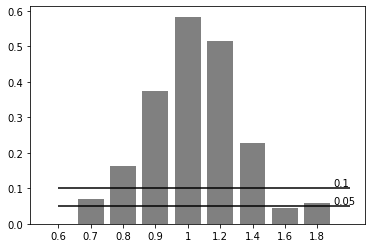

In [32]:
for i in range(len(ex_delta)):
    key = f'{ex_delta[i]:.1f}'
    val = pvalue_dict[key]
    plt.bar(i, val, color='grey')
    
plt.xticks(list(range(len(ex_delta))), ex_delta)
plt.hlines([0.05, 0.1], xmin=0, xmax=len(ex_delta))
plt.text(len(ex_delta)-0.5, 0.055, '0.05')
plt.text(len(ex_delta)-0.5, 0.105, '0.1');